In [1]:
%load_ext autoreload
%autoreload 2

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def get_result(experiment):
    return pd.read_csv(f'../results/{experiment}_experiment.csv')

In [66]:
experiments = ('baseline', 'blind', 'augment', 'CLP1nt', 'CLP005', 'CLP1')
dfs = [get_result(e) for e in experiments]

In [67]:
tab_1_results = []
tab_1_cols = ['ctf_cc_train', 'ctf_synth_toxic', 'ctf_synth_nontoxic']
for e, df  in zip(experiments, dfs):
    row = [e] + list(df.mean()[tab_1_cols])
    tab_1_results.append(row)
df_tab_1 = pd.DataFrame(tab_1_results, columns=['experiment'] + tab_1_cols)

In [68]:
df_tab_1

,experiment,ctf_cc_train,ctf_synth_toxic,ctf_synth_nontoxic
0,baseline,0.054191,0.104661,0.199343
1,blind,0.048563,0.087042,0.120076
2,augment,0.024768,0.050002,0.026411
3,CLP1nt,0.021146,0.036304,0.023447
4,CLP005,0.014504,0.084824,0.115923
5,CLP1,0.000630,0.000420,0.000364


In [69]:
tab_2_results = []
tab_2_cols = ['ctf_cc_eval']
for e, df  in zip(experiments, dfs):
    row = [e] + list(df.mean()[tab_2_cols])
    tab_2_results.append(row)
df_tab_2 = pd.DataFrame(tab_2_results, columns=['experiment'] + tab_2_cols)

In [70]:
df_tab_2

,experiment,ctf_cc_eval
0,baseline,0.158381
1,blind,0.133881
2,augment,0.047207
3,CLP1nt,0.028986
4,CLP005,0.100350
5,CLP1,0.000796


In [71]:
fig_1_TNR = {}
fig_1_TPR = {}
fig_1_CTF = {}
fig_1_res = ['cci_tn', 'cci_tp', 'ctf_cc_train']

for e, df  in zip(experiments, dfs):
    res = list(df.mean()[fig_1_res])
    fig_1_TNR[e] = res[0]
    fig_1_TPR[e] = res[1]
    fig_1_CTF[e] = res[2]

Text(0.5, 1.0, 'TNR')

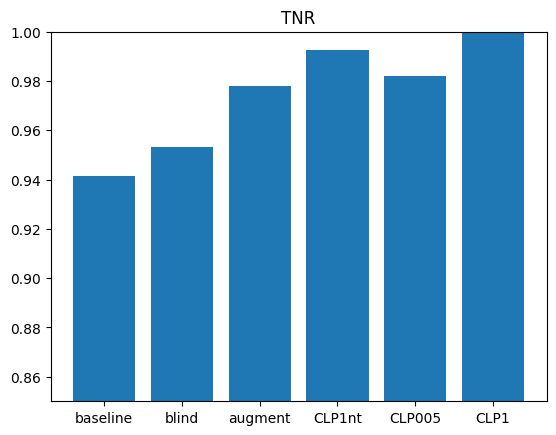

In [72]:
plt.bar(fig_1_TNR.keys(),fig_1_TNR.values())
plt.ylim(0.85,1)
plt.title('TNR')

Text(0.5, 1.0, 'TPR')

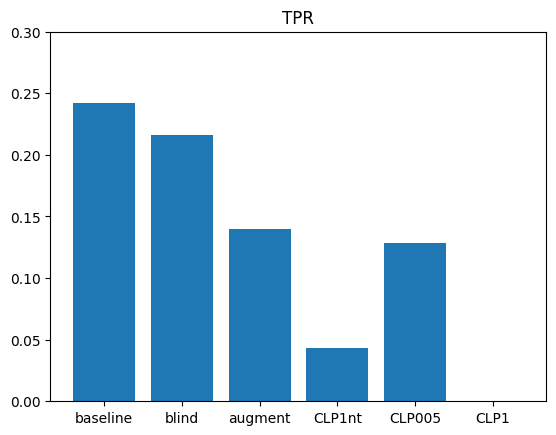

In [73]:
plt.bar(fig_1_TPR.keys(),fig_1_TPR.values())
plt.ylim(0.0,0.3)
plt.title('TPR')

Text(0.5, 1.0, 'CTF')

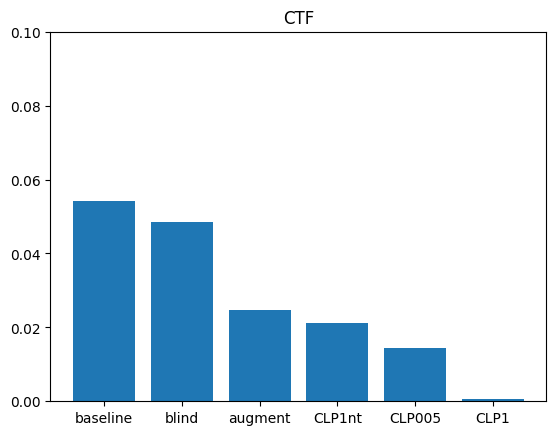

In [74]:
plt.bar(fig_1_CTF.keys(),fig_1_CTF.values())
plt.ylim(0.0,0.1)
plt.title('CTF')